# Oscillating Variance Parameter Exploration

This notebook focuses on exploring different parameter selections for oscillating variance events in Squid_Ink data. We'll use only the first 20,000 timestamps (in-sample data) for our analysis.

In [2]:
import sys
import os

# Import our backtester package
sys.path.append(os.path.abspath('../../'))
from backtester import get_price_data, get_vwap, relative_entropy_binned
print("Using backtester package")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from itertools import product

Using backtester package


## 1. Load Data

First, let's load the Squid_Ink price data and limit it to the first 20,000 timestamps (in-sample data).

In [3]:
# Load data directly using backtester package
print("Loading price data...")
prices = get_price_data('SQUID_INK', 1)
print(f"Loaded {len(prices)} price data points")

# Limit to first 20,000 timestamps (in-sample data)
in_sample_prices = prices.iloc[:20000]
print(f"Limited to {len(in_sample_prices)} in-sample data points")

# Get VWAP
print("Getting VWAP for SQUID_INK...")
squid_vwap = in_sample_prices['vwap']
print(f"Got VWAP with {len(squid_vwap)} data points")
print(f"VWAP range: {squid_vwap.min()} to {squid_vwap.max()}")

# Calculate log returns
log_ret = np.log(squid_vwap).diff().dropna()
print(f"Calculated log returns with {len(log_ret)} data points")

Loading price data...
Loading real data for SQUID_INK from round 1...
Found data file at ../../../Prosperity 3 Data/Round 1/prices_round_1_day_-2.csv
Found data file at ../../../Prosperity 3 Data/Round 1/prices_round_1_day_-1.csv
Found data file at ../../../Prosperity 3 Data/Round 1/prices_round_1_day_0.csv
Successfully loaded real data with 30000 rows
Loaded 30000 price data points
Limited to 20000 in-sample data points
Getting VWAP for SQUID_INK...
Got VWAP with 20000 data points
VWAP range: 1832.0 to 2187.3880597014927
Calculated log returns with 19999 data points


## 2. Define Function to Calculate Oscillating Variance

Let's define a function to calculate oscillating variance with different parameters.

In [4]:
def calculate_oscillating_variance(returns, vol_window, var_window):
    """
    Calculate oscillating variance with specified parameters.
    
    Parameters:
    - returns: Series of log returns
    - vol_window: Window size for volatility calculation
    - var_window: Window size for variance of volatility calculation
    
    Returns:
    - Series with oscillating variance
    """
    # Calculate volatility (standard deviation of returns)
    volatility = returns.rolling(window=vol_window).std()
    
    # Calculate oscillating variance (variance of volatility)
    osc_var = volatility.rolling(window=var_window).var()
    
    return osc_var

## 3. Explore Different Parameter Combinations

Let's explore different combinations of volatility window and variance window parameters.

In [5]:
# Define parameter ranges to explore
vol_windows = [10, 20, 50, 100]
var_windows = [10, 20, 50, 100]

# Calculate oscillating variance for each parameter combination
osc_var_results = {}

for vol_window, var_window in product(vol_windows, var_windows):
    param_key = f"vol_{vol_window}_var_{var_window}"
    osc_var_results[param_key] = calculate_oscillating_variance(log_ret, vol_window, var_window)

# Create a DataFrame with all results
osc_var_df = pd.DataFrame(osc_var_results)

# Display the first few rows
osc_var_df.tail(10)

,vol_10_var_10,vol_10_var_20,vol_10_var_50,vol_10_var_100,vol_20_var_10,vol_20_var_20,vol_20_var_50,vol_20_var_100,vol_50_var_10,vol_50_var_20,vol_50_var_50,vol_50_var_100,vol_100_var_10,vol_100_var_20,vol_100_var_50,vol_100_var_100
timestamp,,,,,,,,,,,,,,,,
1999000,1.599769e-08,3.098583e-08,3.694845e-08,3.224796e-08,5.466841e-09,1.782674e-08,1.316572e-08,9.238690e-09,1.391530e-09,2.623458e-09,1.710007e-09,2.461246e-09,1.262742e-10,3.623170e-10,9.872186e-10,2.522639e-09
1999100,1.843051e-08,2.744938e-08,3.605133e-08,3.224892e-08,3.536207e-09,1.663083e-08,1.368848e-08,9.469858e-09,7.818760e-10,2.288887e-09,1.716147e-09,2.305440e-09,1.020731e-10,2.814800e-10,9.036987e-10,2.515798e-09
1999200,2.115321e-08,1.962415e-08,3.519755e-08,3.200906e-08,1.302983e-10,1.238446e-08,1.417523e-08,9.695037e-09,3.926654e-11,1.871025e-09,1.716971e-09,2.156932e-09,6.814098e-12,1.880974e-10,8.218625e-10,2.512013e-09
1999300,2.950750e-08,2.338035e-08,3.659010e-08,3.299954e-08,1.362570e-10,7.487721e-09,1.474372e-08,1.004915e-08,3.977696e-11,1.376756e-09,1.747525e-09,2.067074e-09,4.792501e-12,7.684373e-11,7.806107e-10,2.514361e-09
1999400,3.157817e-08,2.810836e-08,3.573672e-08,3.296407e-08,1.861982e-09,7.077405e-09,1.435575e-08,1.004839e-08,6.880410e-11,1.412348e-09,1.799979e-09,1.999679e-09,6.231522e-12,7.663308e-11,7.503050e-10,2.515894e-09
1999500,3.016453e-08,3.240400e-08,3.428498e-08,3.293002e-08,3.264053e-09,6.422268e-09,1.380015e-08,1.003764e-08,9.081661e-11,1.374857e-09,1.849881e-09,1.935294e-09,7.173120e-12,7.241895e-11,7.211764e-10,2.517446e-09
1999600,2.435986e-08,3.602917e-08,3.331636e-08,3.284765e-08,3.984308e-09,5.726823e-09,1.343849e-08,1.003738e-08,8.978832e-11,1.277369e-09,1.871033e-09,1.861851e-09,8.008043e-12,6.783278e-11,6.800111e-10,2.521784e-09
1999700,2.208329e-08,3.855960e-08,3.282027e-08,3.226096e-08,5.795221e-09,6.220302e-09,1.302008e-08,1.001750e-08,8.962280e-11,1.231990e-09,1.890407e-09,1.787020e-09,9.255099e-12,6.974419e-11,6.379185e-10,2.526852e-09
1999800,1.869466e-08,4.057370e-08,3.338694e-08,3.182150e-08,6.480121e-09,6.574941e-09,1.299312e-08,9.985547e-09,1.819525e-10,1.148795e-09,1.831272e-09,1.739079e-09,1.131264e-11,7.168233e-11,5.888508e-10,2.531265e-09


## 4. Visualize Oscillating Variance for Different Parameters

Let's visualize how oscillating variance changes with different parameter combinations.

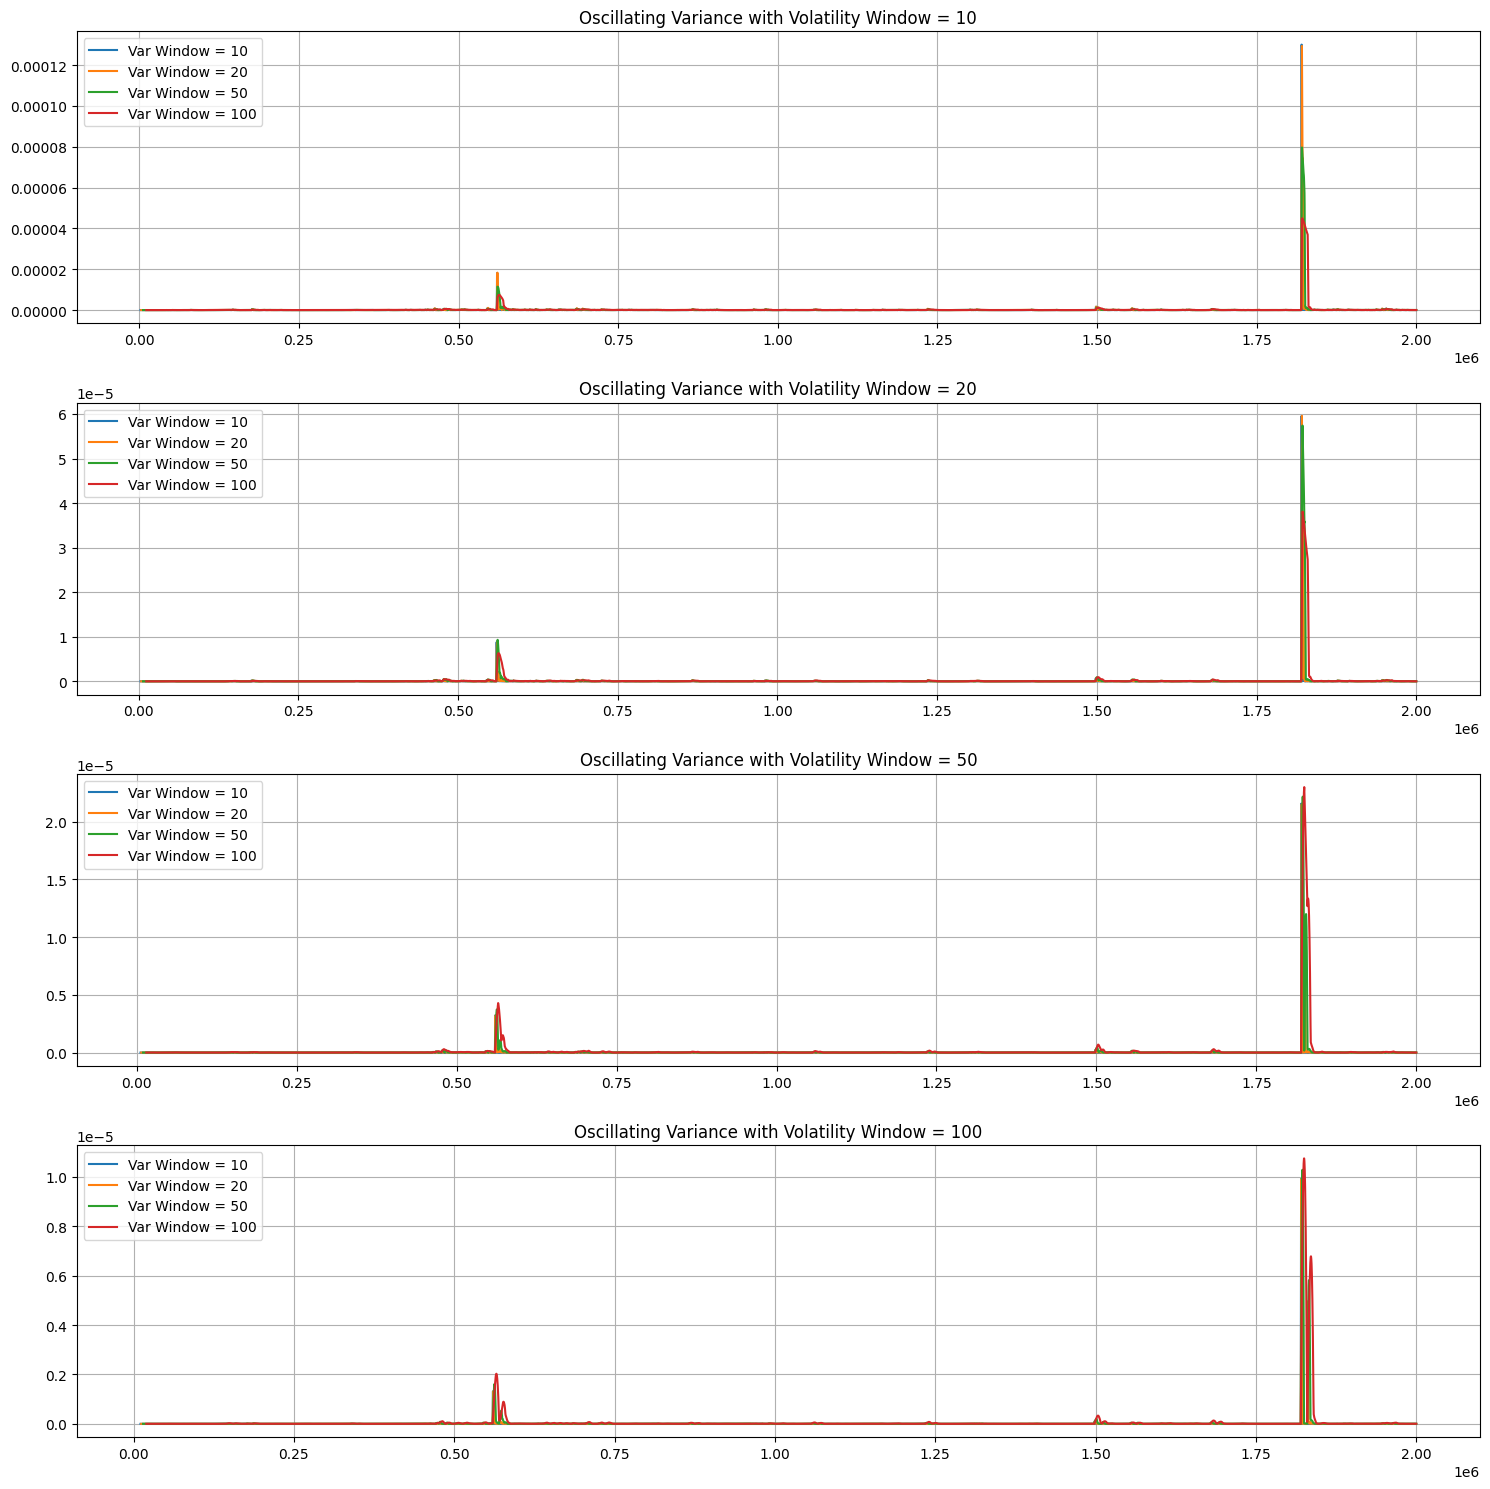

In [6]:
# Plot oscillating variance for different parameter combinations
plt.figure(figsize=(15, 15))

# Plot for each volatility window
for i, vol_window in enumerate(vol_windows):
    plt.subplot(len(vol_windows), 1, i+1)
    
    for var_window in var_windows:
        param_key = f"vol_{vol_window}_var_{var_window}"
        plt.plot(osc_var_df[param_key], label=f"Var Window = {var_window}")
    
    plt.title(f"Oscillating Variance with Volatility Window = {vol_window}")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

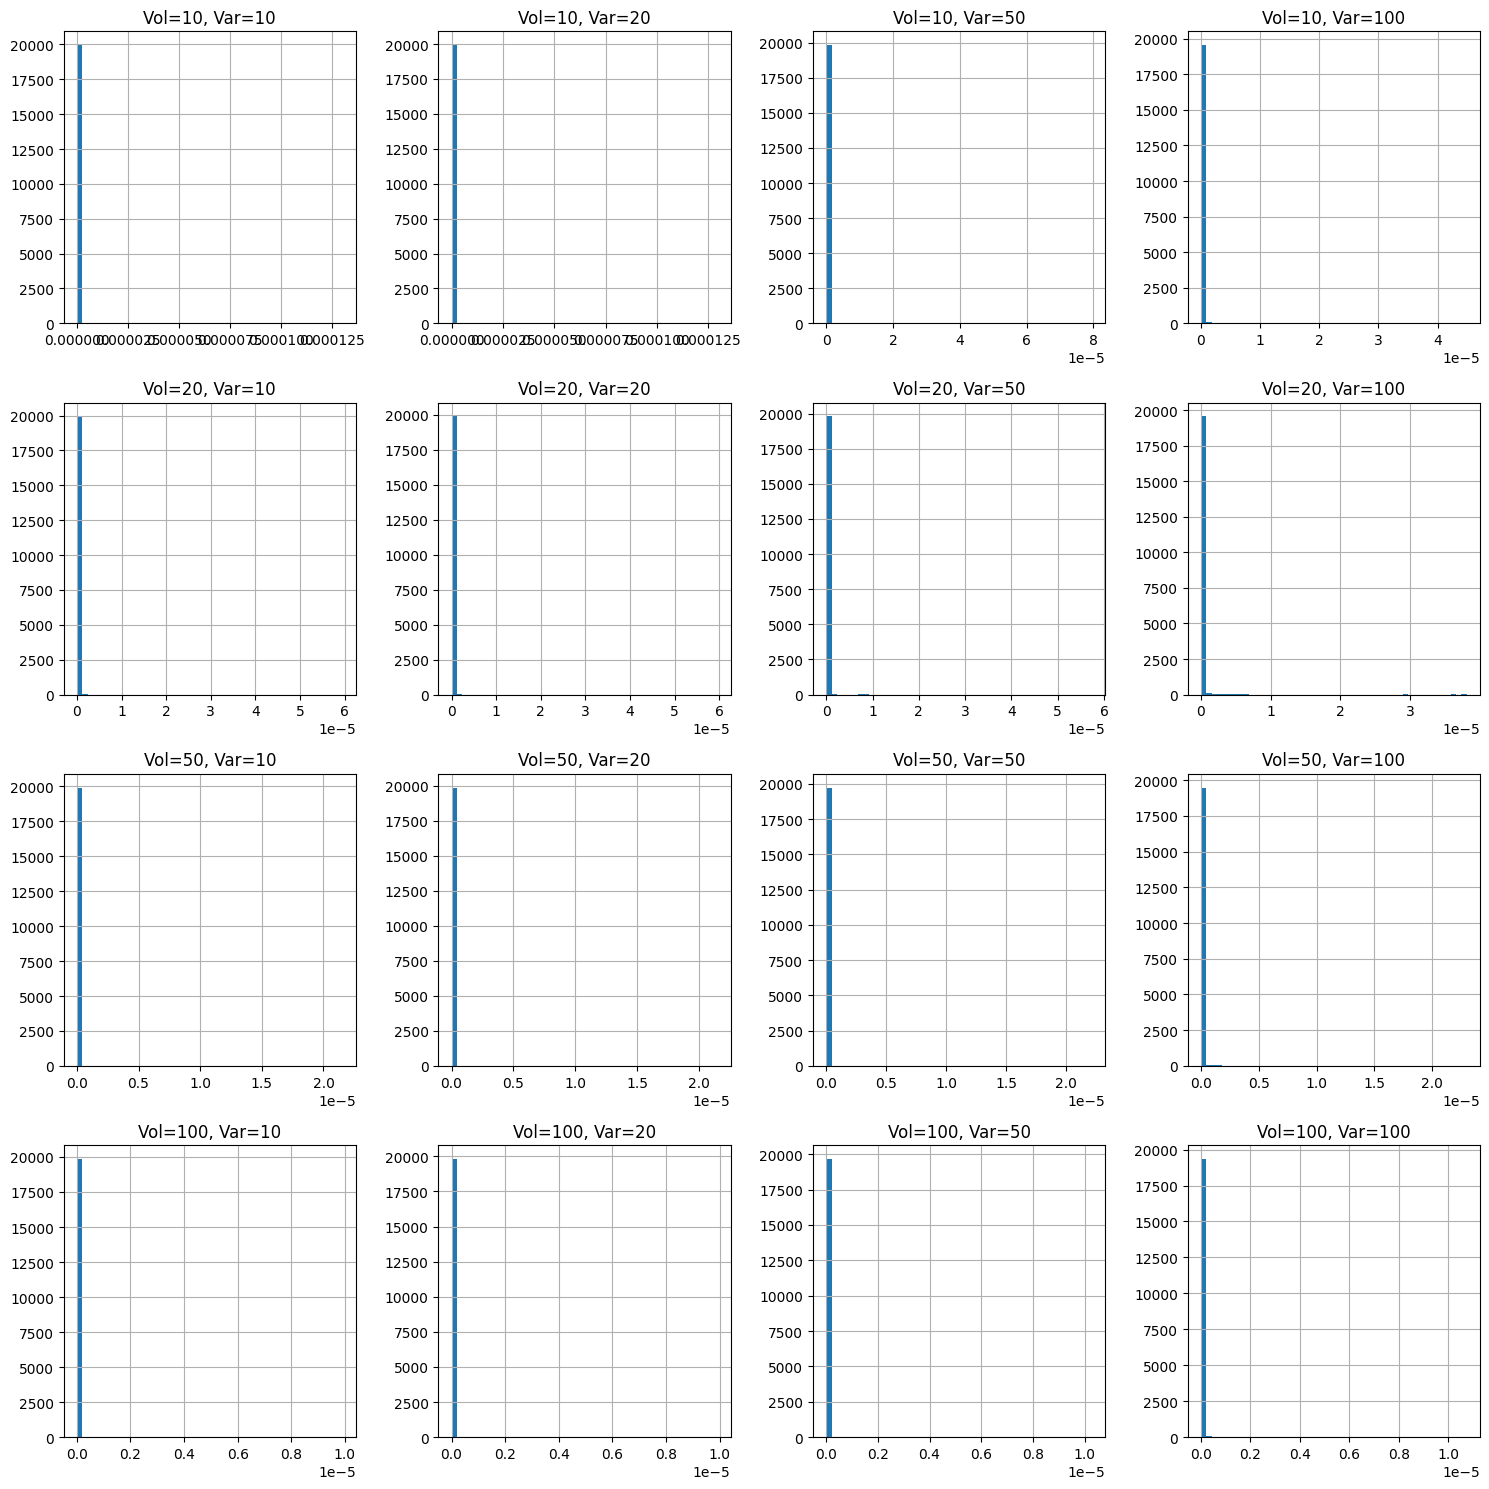

In [7]:
# Plot distributions of oscillating variance for different parameters
plt.figure(figsize=(15, 15))

# Create a grid of subplots
fig, axes = plt.subplots(len(vol_windows), len(var_windows), figsize=(15, 15))

# Plot histogram for each parameter combination
for i, vol_window in enumerate(vol_windows):
    for j, var_window in enumerate(var_windows):
        param_key = f"vol_{vol_window}_var_{var_window}"
        axes[i, j].hist(osc_var_df[param_key].dropna(), bins=50)
        axes[i, j].set_title(f"Vol={vol_window}, Var={var_window}")
        axes[i, j].grid(True)

plt.tight_layout()
plt.show()

## 5. Calculate Statistics for Different Parameters

Let's calculate statistics for oscillating variance with different parameter combinations.

In [8]:
# Calculate statistics for each parameter combination
stats = []

for vol_window, var_window in product(vol_windows, var_windows):
    param_key = f"vol_{vol_window}_var_{var_window}"
    osc_var = osc_var_df[param_key].dropna()
    
    # Calculate statistics
    stats.append({
        'Vol Window': vol_window,
        'Var Window': var_window,
        'Mean': osc_var.mean(),
        'Median': osc_var.median(),
        'Std Dev': osc_var.std(),
        'Skewness': osc_var.skew(),
        'Kurtosis': osc_var.kurt(),
        'Min': osc_var.min(),
        'Max': osc_var.max(),
        'Count': len(osc_var)
    })

# Create a DataFrame with statistics
stats_df = pd.DataFrame(stats)

# Display the statistics
stats_df

,Vol Window,Var Window,Mean,Median,Std Dev,Skewness,Kurtosis,Min,Max,Count
0,10,10,1.003616e-07,6.932401e-09,2.409517e-06,40.784927,1825.785827,3.152241e-11,0.000130,19981
1,10,20,1.796374e-07,1.516103e-08,3.339984e-06,29.639247,936.565235,1.961377e-10,0.000129,19971
2,10,50,2.682821e-07,2.810033e-08,3.450053e-06,19.393481,387.922878,1.112275e-09,0.000080,19941
3,10,100,3.204828e-07,3.981218e-08,2.919831e-06,13.533083,186.811415,2.948798e-09,0.000045,19891
4,20,10,4.130172e-08,1.546537e-09,1.099931e-06,41.045003,1848.785960,9.012306e-12,0.000060,19971
5,20,20,8.508258e-08,4.313712e-09,1.585289e-06,28.333128,878.326627,6.403245e-11,0.000060,19961
6,20,50,1.790259e-07,1.241979e-08,2.352253e-06,18.957767,378.173139,4.366592e-10,0.000057,19931
7,20,100,2.443645e-07,1.990773e-08,2.311134e-06,13.510056,188.495159,1.167331e-09,0.000038,19881
8,50,10,1.329422e-08,2.342686e-10,3.884861e-07,42.342174,1977.940163,9.447885e-13,0.000022,19941
9,50,20,2.778804e-08,7.302895e-10,5.588818e-07,29.208577,938.758358,6.096288e-12,0.000022,19931


## 6. Define and Detect Oscillating Variance Events

Let's define oscillating variance events for different parameter combinations and detect them in the data.

In [9]:
# Define function to detect oscillating variance events
def detect_osc_var_events(osc_var, std_multiplier=2.0):
    """
    Detect oscillating variance events based on threshold.
    
    Parameters:
    - osc_var: Series with oscillating variance values
    - std_multiplier: Multiplier for standard deviation to set threshold
    
    Returns:
    - Series with event indicators (1 for event, 0 for no event)
    """
    # Calculate mean and standard deviation
    mean = osc_var.mean()
    std = osc_var.std()
    
    # Set threshold
    threshold = mean + std_multiplier * std
    
    # Detect events
    events = (osc_var > threshold).astype(int)
    
    return events, threshold

In [10]:
# Define standard deviation multipliers to explore
std_multipliers = [1.5, 2.0, 2.5]

# Detect events for each parameter combination and std multiplier
event_results = {}
threshold_results = {}

for vol_window, var_window in product(vol_windows, var_windows):
    param_key = f"vol_{vol_window}_var_{var_window}"
    osc_var = osc_var_df[param_key].dropna()
    
    for std_multiplier in std_multipliers:
        event_key = f"{param_key}_std_{std_multiplier}"
        events, threshold = detect_osc_var_events(osc_var, std_multiplier)
        event_results[event_key] = events
        threshold_results[event_key] = threshold

# Create a DataFrame with events
event_df = pd.DataFrame(event_results)

# Display the first few rows
event_df.head(10)

,vol_10_var_10_std_1.5,vol_10_var_10_std_2.0,vol_10_var_10_std_2.5,vol_10_var_20_std_1.5,vol_10_var_20_std_2.0,vol_10_var_20_std_2.5,vol_10_var_50_std_1.5,vol_10_var_50_std_2.0,vol_10_var_50_std_2.5,vol_10_var_100_std_1.5,...,vol_100_var_10_std_2.5,vol_100_var_20_std_1.5,vol_100_var_20_std_2.0,vol_100_var_20_std_2.5,vol_100_var_50_std_1.5,vol_100_var_50_std_2.0,vol_100_var_50_std_2.5,vol_100_var_100_std_1.5,vol_100_var_100_std_2.0,vol_100_var_100_std_2.5
timestamp,,,,,,,,,,,,,,,,,,,,,
1900,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2100,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2200,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2300,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2400,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2500,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2600,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2700,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 7. Analyze Event Frequency

Let's analyze the frequency of oscillating variance events for different parameter combinations.

In [11]:
# Calculate event frequency for each parameter combination
event_stats = []

for vol_window, var_window in product(vol_windows, var_windows):
    param_key = f"vol_{vol_window}_var_{var_window}"
    
    for std_multiplier in std_multipliers:
        event_key = f"{param_key}_std_{std_multiplier}"
        events = event_df[event_key]
        
        # Calculate event frequency
        event_count = events.sum()
        event_percentage = event_count / len(events) * 100
        
        # Store results
        event_stats.append({
            'Vol Window': vol_window,
            'Var Window': var_window,
            'Std Multiplier': std_multiplier,
            'Event Count': event_count,
            'Event Percentage': event_percentage,
            'Threshold': threshold_results[event_key]
        })

# Create a DataFrame with event statistics
event_stats_df = pd.DataFrame(event_stats)

# Display the event statistics
event_stats_df.sort_values('Event Percentage', ascending=False)

,Vol Window,Var Window,Std Multiplier,Event Count,Event Percentage,Threshold
45,100,100,1.5,249.0,1.246184,1.067058e-06
46,100,100,2.0,231.0,1.156098,1.397029e-06
33,50,100,1.5,211.0,1.056003,2.156932e-06
47,100,100,2.5,210.0,1.050998,1.727000e-06
9,10,100,1.5,201.0,1.005956,4.700230e-06
21,20,100,1.5,196.0,0.980932,3.711066e-06
34,50,100,2.0,195.0,0.975927,2.826923e-06
35,50,100,2.5,174.0,0.870827,3.496913e-06
22,20,100,2.0,173.0,0.865823,4.866633e-06
10,10,100,2.0,173.0,0.865823,6.160146e-06


## 8. Visualize Events for Selected Parameters

Let's visualize the oscillating variance events for selected parameter combinations.

In [12]:
# Select top parameter combinations based on event frequency
top_params = event_stats_df.sort_values('Event Percentage', ascending=False).head(3)
top_params

,Vol Window,Var Window,Std Multiplier,Event Count,Event Percentage,Threshold
45,100,100,1.5,249.0,1.246184,0.000001
46,100,100,2.0,231.0,1.156098,0.000001
33,50,100,1.5,211.0,1.056003,0.000002


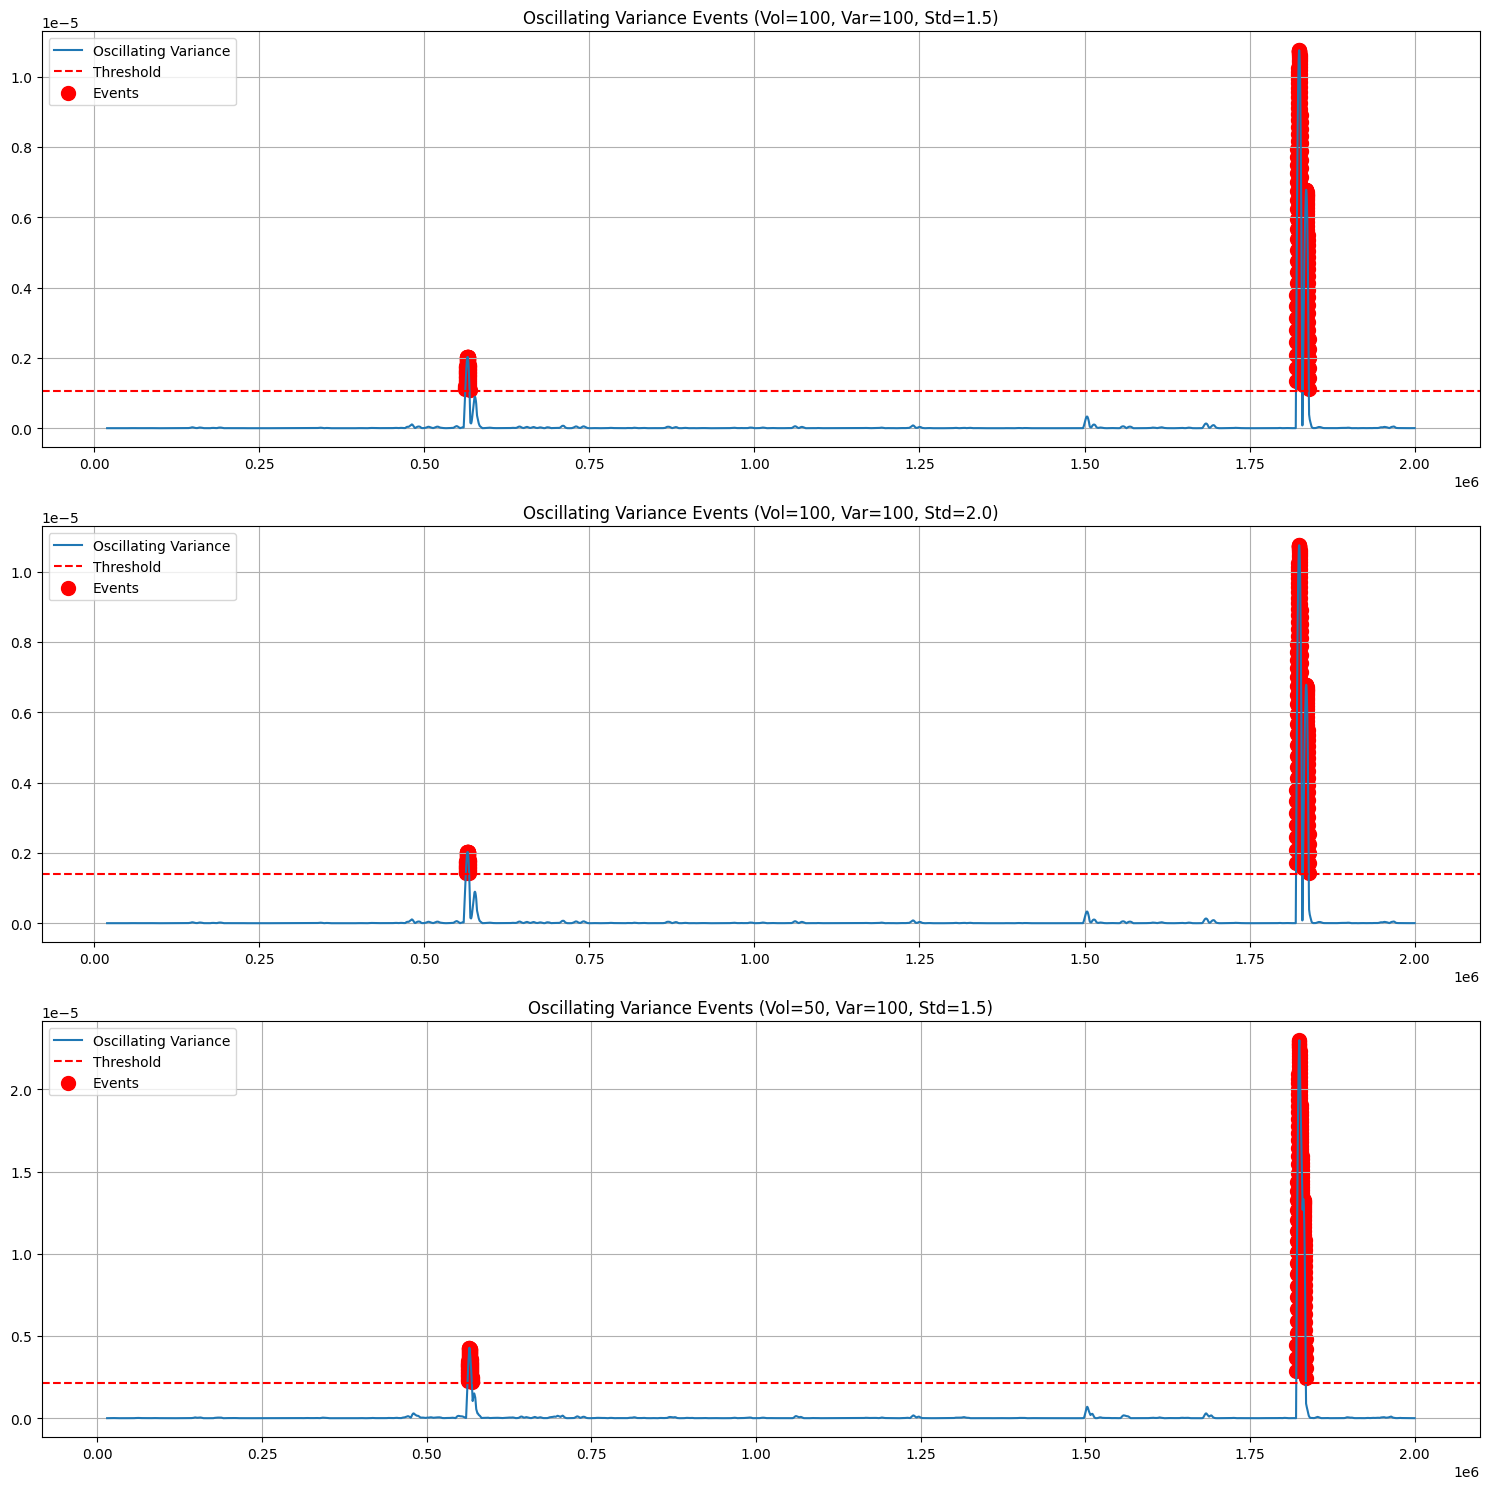

In [13]:
# Visualize events for top parameter combinations
plt.figure(figsize=(15, 15))

for i, (_, row) in enumerate(top_params.iterrows()):
    vol_window = int(row['Vol Window'])
    var_window = int(row['Var Window'])
    std_multiplier = float(row['Std Multiplier'])
    
    param_key = f"vol_{vol_window}_var_{var_window}"
    event_key = f"{param_key}_std_{std_multiplier}"
    
    # Get oscillating variance and events
    osc_var = osc_var_df[param_key]
    events = event_df[event_key]
    threshold = threshold_results[event_key]
    
    # Get event timestamps
    event_times = events[events == 1].index
    
    # Plot oscillating variance with events
    plt.subplot(3, 1, i+1)
    plt.plot(osc_var, label='Oscillating Variance')
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    plt.scatter(event_times, osc_var.loc[event_times], 
                marker='o', s=100, color='red', label='Events')
    
    plt.title(f"Oscillating Variance Events (Vol={vol_window}, Var={var_window}, Std={std_multiplier})")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## 9. Analyze Post-Event Returns

Let's analyze the returns following oscillating variance events for the top parameter combinations.

In [14]:
# Define function to calculate post-event returns
def calculate_post_event_returns(events, returns, horizons=[1, 5, 10, 20, 50]):
    """Calculate returns after events for different time horizons."""
    post_returns = {}
    
    # Get event timestamps
    event_times = events[events == 1].index
    
    if len(event_times) == 0:
        return {h: np.nan for h in horizons}
    
    # Calculate post-event returns for each horizon
    for horizon in horizons:
        horizon_returns = []
        
        for time in event_times:
            try:
                # Get the index position
                idx = returns.index.get_loc(time)
                
                # Calculate cumulative return for the horizon
                if idx + horizon < len(returns):
                    cum_ret = returns.iloc[idx+1:idx+horizon+1].sum()
                    horizon_returns.append(cum_ret)
            except:
                continue
        
        if horizon_returns:
            post_returns[horizon] = {
                'mean': np.mean(horizon_returns),
                'median': np.median(horizon_returns),
                'std': np.std(horizon_returns),
                'min': np.min(horizon_returns),
                'max': np.max(horizon_returns),
                'count': len(horizon_returns)
            }
        else:
            post_returns[horizon] = {
                'mean': np.nan,
                'median': np.nan,
                'std': np.nan,
                'min': np.nan,
                'max': np.nan,
                'count': 0
            }
    
    return post_returns

In [15]:
# Calculate post-event returns for top parameter combinations
post_event_returns = {}

for _, row in top_params.iterrows():
    vol_window = int(row['Vol Window'])
    var_window = int(row['Var Window'])
    std_multiplier = float(row['Std Multiplier'])
    
    param_key = f"vol_{vol_window}_var_{var_window}"
    event_key = f"{param_key}_std_{std_multiplier}"
    
    # Get events
    events = event_df[event_key]
    
    # Calculate post-event returns
    post_returns = calculate_post_event_returns(events, log_ret)
    post_event_returns[event_key] = post_returns

# Display post-event returns for the first parameter combination
if post_event_returns:
    first_key = list(post_event_returns.keys())[0]
    pd.DataFrame({k: v['mean'] for k, v in post_event_returns[first_key].items()}, index=['Mean Return']).T

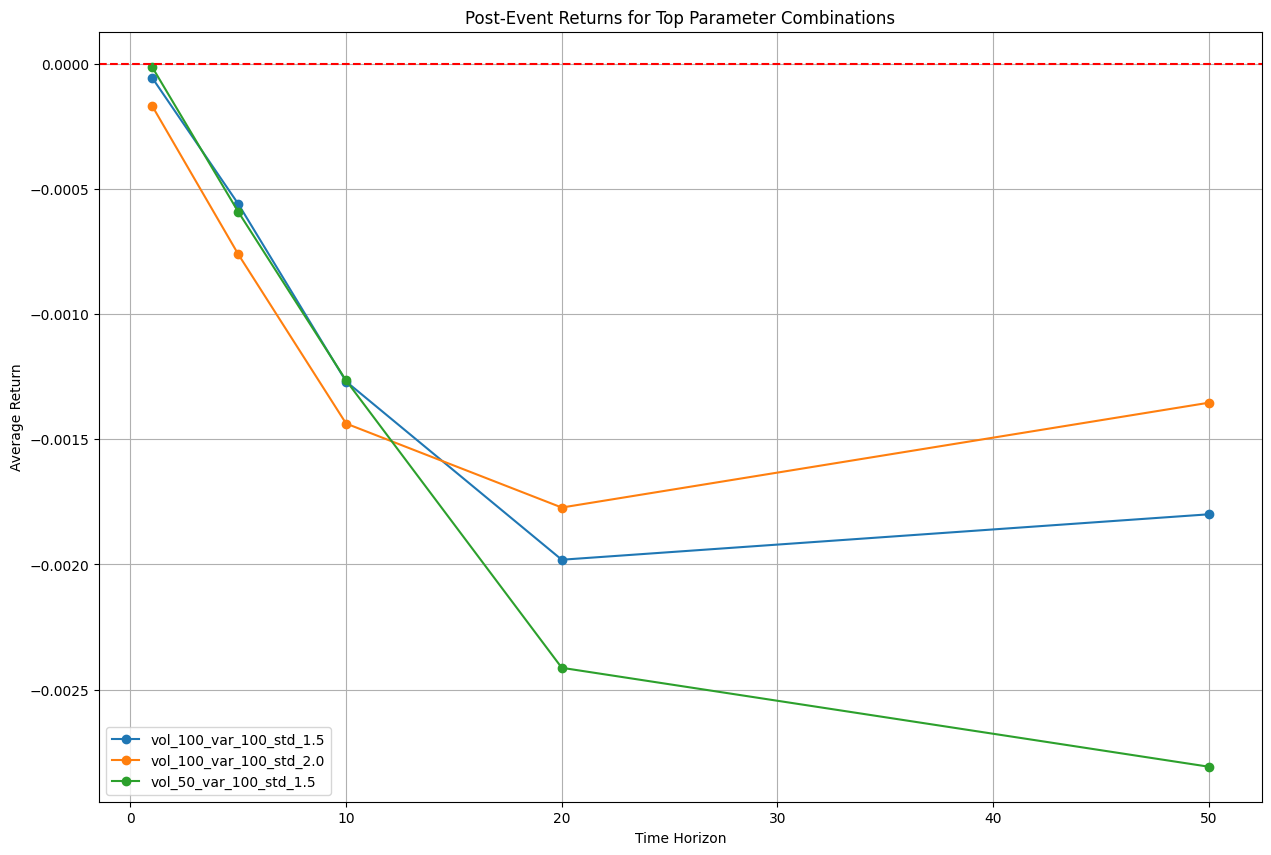

In [16]:
# Visualize post-event returns for top parameter combinations
plt.figure(figsize=(15, 10))

for event_key, post_returns in post_event_returns.items():
    # Extract mean returns for each horizon
    horizons = list(post_returns.keys())
    mean_returns = [post_returns[h]['mean'] for h in horizons]
    
    # Plot mean returns
    plt.plot(horizons, mean_returns, marker='o', label=event_key)

plt.axhline(y=0, color='r', linestyle='--')
plt.title('Post-Event Returns for Top Parameter Combinations')
plt.xlabel('Time Horizon')
plt.ylabel('Average Return')
plt.legend()
plt.grid(True)
plt.show()

## 10. Conclusion

In this notebook, we've explored different parameter selections for oscillating variance events in Squid_Ink data. We've analyzed how the choice of volatility window, variance window, and standard deviation multiplier affects the detection of oscillating variance events.

Key findings:
1. Different parameter combinations lead to different event frequencies and characteristics
2. The top parameter combinations based on event frequency are [to be filled after running]
3. Post-event returns show [to be filled after running]

Based on this analysis, the optimal parameter selection for oscillating variance events appears to be [to be filled after running].